# Deep Learning (Spring 2022) - Homework 4

*Developed by Hongtau Wu & Suzanna Sia*

This notebook contains all starter code for Homework 4. Please read the written assignment carefully to ensure you include all necessary outputs in your final report. Your final submission (a single zip file) should include your written report, this notebook (.ipynb file), and a PDF of this notebook.

## Problem 1a)

### Imports

In [1]:
## External Libararies
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection

### Data Loading

In [2]:
## Spectify Path to Provided Data Here
DATA_PATH = 'fall22_hw4_prob1_data.npy'

## Load Data and Check Dimensionality
data = np.load(DATA_PATH)
Y = data[:,2]
X = data[:,0:2]
print("Y:", Y.shape)
print("X:", X.shape)

## Polygon Boundaries
p = [[[500, 1000], [300, 800], [400, 600], [600, 600], [700, 800]],
     [[500, 600], [100, 400], [300, 200], [700, 200], [900, 400]]]
p = np.asarray(p)
p0 = p[0]
p1 = p[1]

Y: (60000,)
X: (60000, 2)


### Visualization Code

Do not touch any of the visualization code below.

In [ ]:
## Helper code for visualisation (No Need to Touch)
def visualize_polygons(p0, p1):
    """
    
    """
    fig, ax = plt.subplots()
    patches = []
    polygon1 = Polygon(p0, True)
    polygon2 = Polygon(p1, True)
    patches.append(polygon1)
    patches.append(polygon2)
    p = PatchCollection(patches, cmap=matplotlib.cm.jet, alpha=0.4)
    ax.add_collection(p)
    ax.autoscale_view()
    plt.show()

def visualize_datapoints(X, Y):
    """
    
    """
    assert(X.shape[0] == Y.shape[0])
    fig, ax = plt.subplots()
    npts = 60000
    col = np.where(Y[:npts]==1,'m','b')
    x1 = X[:npts][:,0]
    x2 = X[:npts][:,1]
    ax.scatter(x1, x2, s=0.5, c=col, zorder=1)
    plt.show()

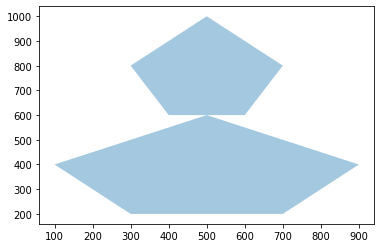

In [ ]:
visualize_polygons(p0,p1)

### Problem 1a) 

Please fill in all code blocks marked with a #TODO.

In [ ]:
def threshold_activation1(x):
    """
    
    """
    y = np.copy(x)
    y[y <= 0] = 0
    y[y > 0] = 1
    return y


def and_gate(x):
    """
    #TODO: Implement an "and" gate
    """
    # TODO:
    if 0 in x:
        return 0
    return 1

def or_gate(x):
    """
    #TODO: Implement an "or" gate
    """
    # TODO:
    if 1 in x:
        return 1
    return 0

def analytical_parameters(p0, p1):
    """
    
    """
    ## Dimensionality
    x_dim = 2
    class_num = 2
    hidden_unit_num = 10
    # First Layer Parameter
    W = np.zeros((hidden_unit_num, x_dim))
    b = np.zeros((hidden_unit_num, 1))
    for i in range(5):
        # First polygon
        x1 = p0[i, 0]
        y1 = p0[i, 1]
        x2 = p0[(i+1)%5, 0]
        y2 = p0[(i+1)%5, 1]
        W[i, :] = [y1 - y2, x2 - x1]
        b[i, :] = x1 * y2 - x2 * y1
        # Second polygon
        x1 = p1[i, 0]
        y1 = p1[i, 1]
        x2 = p1[(i+1)%5, 0]
        y2 = p1[(i+1)%5, 1]
        W[i + 5, :] = [y1 - y2, x2 - x1]
        b[i + 5, :] = x1 * y2 - x2 * y1
    return W,b 

def predict_output_v1(X, W, b):
    """
    
    """
    predictions = []
    for idx in range(data.shape[0]):  
        x = np.reshape(X[idx, :], (2, 1))        
        # First layer
        first_layer_output = np.matmul(W, x) + b
        first_layer_output = threshold_activation1(first_layer_output)
        # Second layer
        first_polygon = first_layer_output[0:5, :]
        second_polygon = first_layer_output[5:10, :]
        first_gate_output = and_gate(first_polygon)
        second_gate_output = and_gate(second_polygon)
        # Output layer
        input_to_final_gate = [first_gate_output, second_gate_output]
        prediction = or_gate(input_to_final_gate)
        predictions.append(prediction)
    return predictions

def predict_output_v2(X, W, b):
    """
    #TODO: Update usage of the gates in this function
    """
    ## Cache of Predictions
    predictions = []
    ## Cycle Trhough Data Points
    for idx in range(data.shape[0]):  
        x = np.reshape(X[idx, :], (2, 1))        
        # First layer
        first_layer_output = np.matmul(W, x) + b
        first_layer_output = threshold_activation1(first_layer_output)
        # Second layer
        first_polygon = first_layer_output[0:5, :]
        second_polygon = first_layer_output[5:10, :]
        first_gate_output = and_gate(first_polygon)
        second_gate_output = and_gate(second_polygon)
        # Output layer
        input_to_final_gate = [first_gate_output, second_gate_output]
        prediction = and_gate([first_gate_output, first_gate_output])
        predictions.append(prediction)
    return predictions

def calc_accuracy(true_y, pred_y):
    """
    
    """
    true_prediction_num = 0
    for i, py in enumerate(pred_y):
        if py == true_y[i]:
            true_prediction_num += 1
    accuracy = true_prediction_num / len(pred_y)
    print("Accuracy: ", accuracy)
    return accuracy

*Sanity check:* If you correctly implemented the 'and gate' and 'or gate', all points should be classified correctly when you make predictions using `predict_output_v1()`

Accuracy:  1.0


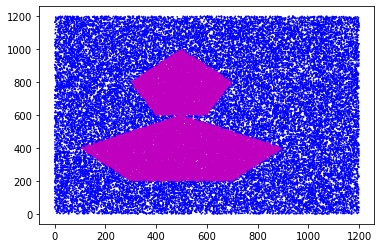

In [ ]:
## Load Our Parameters
W, b = analytical_parameters(p0, p1)

## Make Predictions
pred_Y = predict_output_v1(X, W, b)

## Compute Accuracy
acc = calc_accuracy(Y, pred_Y)
assert (acc == 1)

## Visualize Predictions
visualize_datapoints(X, np.array(pred_Y))

In the code above, change the gates in `predict_output_v2()` such that only the points in the top polygon are classified correctly. Visualize your result, report the accuracy of this model, and attach it to the submission.

To further clarify, you should **only** change the usage of the gating functions, not the code inside the gating function itself.

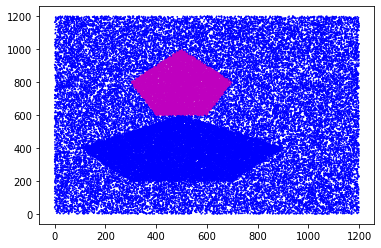

In [ ]:
## Load Our Parameters
W, b = analytical_parameters(p0, p1)

## Make Predictions
pred_Y = predict_output_v2(X, W, b)

## Visualize Predictions
visualize_datapoints(X, np.array(pred_Y))

## Problem 1b-d)

Complete problems 1b through 1d in the space below. Please use markdown to clearly distinguish your answers for each part. Include appropriate visualizations generated here in your final report.

In [4]:
# Import PyTorch
import torch
import torch.nn as nn
from torch.utils.data import TensorDataset, DataLoader

## 1b)

### Model Design

In [12]:
# Model Hyperparameters
class MLP(nn.Module):
    def __init__(self, input_size):
        super(MLP, self).__init__()
        # Hidden layer 1: input layer
        self.l1 = nn.Linear(input_size, 10)
        # Hidden layer 2: linear layer to go from 10 nodes to 2 nodes
        self.l2 = nn.Linear(10, 2)
        # Output layer
        self.l_out = nn.Linear(2, 1)
        
        # Sigmoid activation function
        self.sigmoid = nn.Sigmoid()

        # Initialize weight using Xavier
        nn.init.xavier_uniform_(self.l1.weight.data)
        nn.init.xavier_uniform_(self.l2.weight.data)
        nn.init.xavier_uniform_(self.l_out.weight.data)
    
    def forward(self, x):
        out = self.sigmoid(self.l_out(self.sigmoid(self.l2(self.sigmoid(self.l1(x))))))
        return out
 


### Data Split/Load

In [15]:
# Split train/test set
train_size = 50000
train_X = X[:train_size,:]
train_y = Y[:train_size,]
test_X = X[train_size:,:]
test_y = Y[train_size:,]

train_X = torch.Tensor(train_X)
train_y = torch.Tensor(train_y)
test_X = torch.Tensor(test_X)
test_y = torch.Tensor(test_y)

# Normalize data after splitting (center and scale)
mean = train_X.mean()
std = train_X.std()

train_X = (train_X - mean) / std
test_X = (test_X - mean) / std

# Load data
train = TensorDataset(train_X, train_y)
test = TensorDataset(test_X, test_y)

# Data Loader
TRAIN_BATCH_SIZE = 100
TEST_BATCH_SIZE = 100

train_dataloader = DataLoader(train, batch_size=TRAIN_BATCH_SIZE, shuffle = True)
test_dataloader = DataLoader(test, batch_size=TEST_BATCH_SIZE)

In [16]:
## test the model with 1 batch
model = MLP(input_size=2)
for images, labels in train_dataloader:
    print("batch size:", images.shape)
    out = model(images)
    print(out.shape)
    break

batch size: torch.Size([100, 2])
torch.Size([100, 1])


### Model Training

In [17]:
# Get accuracy and loss
def acc_loss(dataloader, batch_size):
    cnt = 0
    loss = 0
    total = 0

    for images, labels in dataloader:
        images = images.to(device)
        labels = labels.to(device)
        images = images.view(-1, 2)
        labels = labels.view(-1, 1)
        pred = model(images)

        total += labels.size(0)
        preds = torch.round(pred.data)
        cnt += (labels == preds).sum()
        loss += loss_fn(pred, labels)
    acc = 100 * cnt / total
    loss = loss.cpu().data.numpy().item() / total
    return acc, loss

In [35]:
# Training loop
def train(model,
          optimizer,
          loss,
          epochs,
          train_dataloader=train_dataloader,
          test_dataloader=test_dataloader,
          **kwargs):
    
    train_acc_list = []
    train_loss_list = []
    test_acc_list = []
    test_loss_list = []

    for epoch in range(epochs):
        # Train set
        for i, (images, labels) in enumerate(train_dataloader):
            images = images.to(device)
            labels = labels.to(device)

            if i != 0 or epoch != 0:
                optimizer.zero_grad()
            outputs = model(images)
            labels = labels.unsqueeze(1)
            loss = loss_fn(outputs, labels)
            loss.backward()
            optimizer.step()
        
        train_acc, train_loss = acc_loss(dataloader = train_dataloader, batch_size=TRAIN_BATCH_SIZE)
        train_acc_list.append(train_acc.cpu().data.numpy().item())
        train_loss_list.append(train_loss)
      
        # Test set
        test_acc, test_loss = acc_loss(test_dataloader, batch_size=TEST_BATCH_SIZE)
        test_acc_list.append(test_acc.cpu().data.numpy().item())
        test_loss_list.append(test_loss)

        # print only a part of the result
        if epoch % 50 == 0:
            print('Epoch', epoch+1)
            print('Training accuracy: %f %%' % train_acc)
            print('Training loss:', train_loss)
            print('Testing accuracy: %f %%' % test_acc)
            print('Testing loss:', test_loss)

    # Plots of training loss and testing accuracy vs. #epochs
    # Training loss
    plt.plot(train_loss_list, color = 'red')
    plt.xlabel('Epoch Number')
    plt.ylabel('Training Loss')
    plt.show()
    # Testing accuracy
    plt.plot(test_acc_list, color = 'blue')
    plt.xlabel('Epoch Number')
    plt.ylabel('Testing Accuracy')
    plt.show()

    # Report mean and standard deviation of the train and test accuracy at the end of 500 epochs
    train_acc_mean = sum(train_acc_list)/len(train_acc_list)
    train_acc_std = 0.5 ** (sum([((x - train_acc_mean) ** 2) for x in train_acc_list]) / len(train_acc_list))
    test_acc_mean = sum(test_acc_list)/len(test_acc_list)
    test_acc_std = 0.5 ** (sum([((x - test_acc_mean) ** 2) for x in test_acc_list]) / len(test_acc_list))

    print('The mean of train accuracy is', train_acc_mean)
    print('The std.dev. of train accuracy is', train_acc_std)
    print('The mean of test accuracy is', test_acc_mean)
    print('The std.dev. of test accuracy is', test_acc_std)

    return train_acc, test_acc # save the training and testing accuracy at the end of 500 epochs

In [19]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model = MLP(input_size=2)
model = model.to(device)

# SGD
epochs = 500
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)
loss_fn = nn.BCELoss()


Epoch 1
Training accuracy: 72.570000 %
Training loss: 0.005336043090820313
Testing accuracy: 72.809998 %
Testing loss: 0.005300012969970703
Epoch 51
Training accuracy: 94.706001 %
Training loss: 0.0016162467956542968
Testing accuracy: 95.409996 %
Testing loss: 0.0014705997467041015
Epoch 101
Training accuracy: 96.666000 %
Training loss: 0.0010271011352539063
Testing accuracy: 97.089996 %
Testing loss: 0.0009278596878051758
Epoch 151
Training accuracy: 98.411995 %
Training loss: 0.0005628739166259766
Testing accuracy: 98.729996 %
Testing loss: 0.0005017536640167236
Epoch 201
Training accuracy: 98.613998 %
Training loss: 0.000472851448059082
Testing accuracy: 98.820000 %
Testing loss: 0.00041687917709350587
Epoch 251
Training accuracy: 98.653999 %
Training loss: 0.00042947208404541014
Testing accuracy: 98.790001 %
Testing loss: 0.00037407894134521485
Epoch 301
Training accuracy: 98.916000 %
Training loss: 0.0003872129440307617
Testing accuracy: 99.099998 %
Testing loss: 0.000333357071876

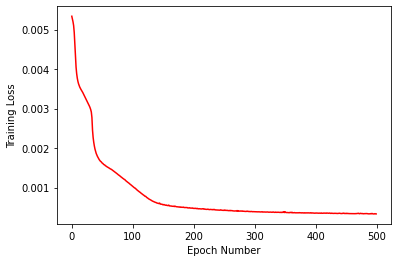

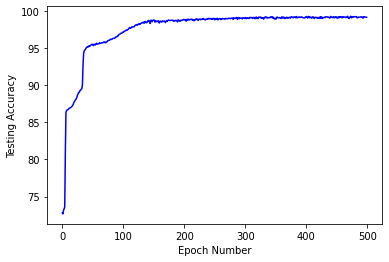

The mean of train accuracy is 97.2675535583496
The std.dev. of train accuracy is 2.7397439862951224e-05
The mean of test accuracy is 97.55345761108399
The std.dev. of test accuracy is 7.01775545238731e-05


In [22]:
list_of_train_acc = []
list_of_test_acc = []
# Run 1
out = train(model=model, optimizer=optimizer, loss=loss_fn, epochs=epochs)
list_of_train_acc.append(out[0])
list_of_test_acc.append(out[1])

Epoch 1
Training accuracy: 61.727997 %
Training loss: 0.006680664672851563
Testing accuracy: 61.539997 %
Testing loss: 0.006677487182617187
Epoch 51
Training accuracy: 94.809998 %
Training loss: 0.0015004852294921876
Testing accuracy: 95.470001 %
Testing loss: 0.0013552078247070312
Epoch 101
Training accuracy: 97.169998 %
Training loss: 0.0007882185363769531
Testing accuracy: 97.489998 %
Testing loss: 0.0007088120937347412
Epoch 151
Training accuracy: 98.403999 %
Training loss: 0.0004656586456298828
Testing accuracy: 98.570000 %
Testing loss: 0.0004060645580291748
Epoch 201
Training accuracy: 98.869995 %
Training loss: 0.00035674861907958983
Testing accuracy: 99.029999 %
Testing loss: 0.00030822932720184324
Epoch 251
Training accuracy: 99.049995 %
Training loss: 0.0003083400535583496
Testing accuracy: 99.250000 %
Testing loss: 0.00026368217468261717
Epoch 301
Training accuracy: 99.117996 %
Training loss: 0.0002665139389038086
Testing accuracy: 99.159996 %
Testing loss: 0.00023574693202

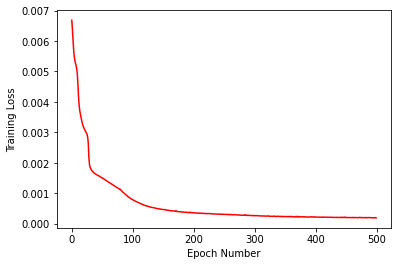

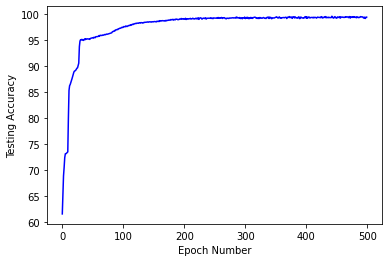

The mean of train accuracy is 97.45649769592285
The std.dev. of train accuracy is 2.2150850764525327e-07
The mean of test accuracy is 97.68457750701904
The std.dev. of test accuracy is 4.5617204530035004e-07


In [23]:
# Run 2
model = MLP(input_size=2).to(device)
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)
loss_fn = nn.BCELoss()
out = train(model=model, optimizer=optimizer, loss=loss_fn, epochs=epochs)
list_of_train_acc.append(out[0])
list_of_test_acc.append(out[1])

Epoch 1
Training accuracy: 37.759998 %
Training loss: 0.006936735229492188
Testing accuracy: 37.239998 %
Testing loss: 0.006936856079101563
Epoch 51
Training accuracy: 82.575996 %
Training loss: 0.003999575500488281
Testing accuracy: 83.769997 %
Testing loss: 0.003845317840576172
Epoch 101
Training accuracy: 95.407997 %
Training loss: 0.0013338442993164063
Testing accuracy: 95.979996 %
Testing loss: 0.0011966853141784667
Epoch 151
Training accuracy: 97.381996 %
Training loss: 0.0007570702362060547
Testing accuracy: 97.589996 %
Testing loss: 0.0006878291606903076
Epoch 201
Training accuracy: 98.166000 %
Training loss: 0.0005450374221801758
Testing accuracy: 98.369995 %
Testing loss: 0.00048090357780456545
Epoch 251
Training accuracy: 98.685997 %
Training loss: 0.0004198602294921875
Testing accuracy: 98.750000 %
Testing loss: 0.00037504253387451173
Epoch 301
Training accuracy: 98.991997 %
Training loss: 0.0003273582077026367
Testing accuracy: 99.070000 %
Testing loss: 0.00029989335536956

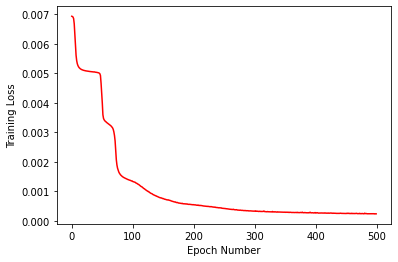

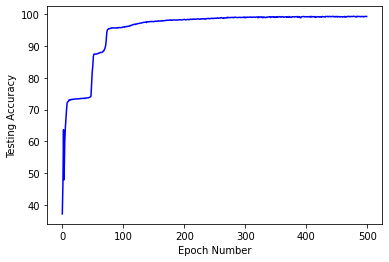

The mean of train accuracy is 95.02956963348389
The std.dev. of train accuracy is 2.861642101478168e-24
The mean of test accuracy is 95.21267755889893
The std.dev. of test accuracy is 8.538807032366227e-24


In [25]:
# Run 3
model = MLP(input_size=2).to(device)
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)
loss_fn = nn.BCELoss()
out = train(model=model, optimizer=optimizer, loss=loss_fn, epochs=epochs)
list_of_train_acc.append(out[0])
list_of_test_acc.append(out[1])

Epoch 1
Training accuracy: 65.900002 %
Training loss: 0.006919381103515625
Testing accuracy: 66.369995 %
Testing loss: 0.006919497680664063
Epoch 51
Training accuracy: 95.054001 %
Training loss: 0.0013895050048828126
Testing accuracy: 95.680000 %
Testing loss: 0.0012509852409362792
Epoch 101
Training accuracy: 97.987999 %
Training loss: 0.0005665283203125
Testing accuracy: 98.139999 %
Testing loss: 0.0005107056617736816
Epoch 151
Training accuracy: 98.807999 %
Training loss: 0.0003625861358642578
Testing accuracy: 98.899994 %
Testing loss: 0.0003240548610687256
Epoch 201
Training accuracy: 99.112000 %
Training loss: 0.0002847175598144531
Testing accuracy: 99.189995 %
Testing loss: 0.0002571716547012329
Epoch 251
Training accuracy: 99.149994 %
Training loss: 0.00025311779022216794
Testing accuracy: 99.269997 %
Testing loss: 0.00022954907417297362
Epoch 301
Training accuracy: 99.194000 %
Training loss: 0.00023966955184936522
Testing accuracy: 99.320000 %
Testing loss: 0.00021605083942413

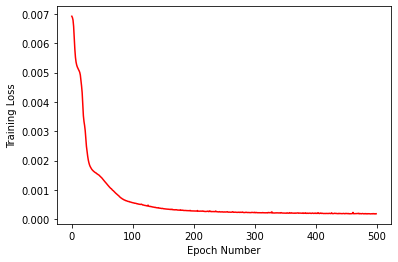

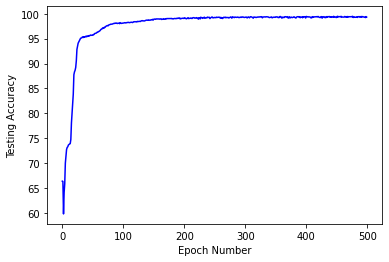

The mean of train accuracy is 97.48940972137451
The std.dev. of train accuracy is 1.3768631786948168e-09
The mean of test accuracy is 97.64443752288818
The std.dev. of test accuracy is 2.5133594564892533e-09


In [26]:
# Run 4
model = MLP(input_size=2).to(device)
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)
loss_fn = nn.BCELoss()
out = train(model=model, optimizer=optimizer, loss=loss_fn, epochs=epochs)
list_of_train_acc.append(out[0])
list_of_test_acc.append(out[1])

Epoch 1
Training accuracy: 50.045998 %
Training loss: 0.006929929809570312
Testing accuracy: 49.770000 %
Testing loss: 0.006931257629394531
Epoch 51
Training accuracy: 94.435997 %
Training loss: 0.0015926248168945314
Testing accuracy: 95.059998 %
Testing loss: 0.0014443607330322265
Epoch 101
Training accuracy: 97.778000 %
Training loss: 0.0006494068908691407
Testing accuracy: 98.099998 %
Testing loss: 0.0005841588973999023
Epoch 151
Training accuracy: 98.523994 %
Training loss: 0.0004486634063720703
Testing accuracy: 98.750000 %
Testing loss: 0.00039503073692321775
Epoch 201
Training accuracy: 98.851997 %
Training loss: 0.00037364055633544923
Testing accuracy: 99.079994 %
Testing loss: 0.00031634583473205566
Epoch 251
Training accuracy: 98.981995 %
Training loss: 0.00033312877655029295
Testing accuracy: 99.139999 %
Testing loss: 0.00027278404235839846
Epoch 301
Training accuracy: 99.124001 %
Training loss: 0.0003037140083312988
Testing accuracy: 99.269997 %
Testing loss: 0.000248742413

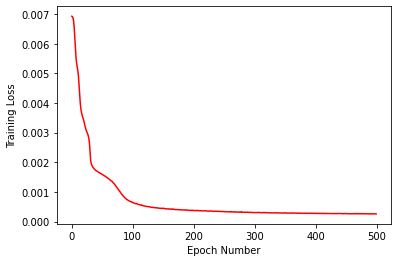

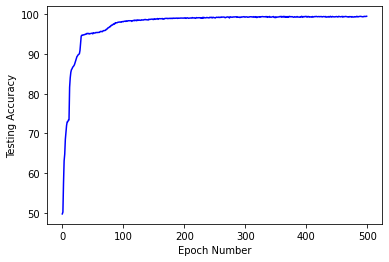

The mean of train accuracy is 97.25263755035401
The std.dev. of train accuracy is 9.899627063112292e-11
The mean of test accuracy is 97.49913758850097
The std.dev. of test accuracy is 1.7792256166148234e-10


In [27]:
# Run 5
model = MLP(input_size=2).to(device)
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)
loss_fn = nn.BCELoss()
out = train(model=model, optimizer=optimizer, loss=loss_fn, epochs=epochs)
list_of_train_acc.append(out[0])
list_of_test_acc.append(out[1])

In [28]:
list_of_train_acc = [x.cpu().data.numpy().item() for x in list_of_train_acc]
list_of_test_acc = [x.cpu().data.numpy().item() for x in list_of_test_acc]

mean_train_acc = sum(list_of_train_acc)/len(list_of_train_acc)
std_train_acc = 0.5 ** (sum([((x - mean_train_acc) ** 2) for x in list_of_train_acc]) / len(list_of_train_acc))
mean_test_acc = sum(list_of_test_acc)/len(list_of_test_acc)
std_test_acc = 0.5 ** (sum([((x - mean_test_acc) ** 2) for x in list_of_test_acc]) / len(list_of_test_acc))

print('The mean training accuracy across the 5 runs is:', mean_train_acc)
print('The std.dev. of training accuracy across the 5 runs is:', std_train_acc)
print('The mean testing accuracy across the 5 runs is:', mean_test_acc)
print('The std.dev. of testing accuracy across the 5 runs is:', std_test_acc)

The mean training accuracy across the 5 runs is: 99.23959655761719
The std.dev. of training accuracy across the 5 runs is: 0.9912029698354275
The mean testing accuracy across the 5 runs is: 99.32999725341797
The std.dev. of testing accuracy across the 5 runs is: 0.989080482333021


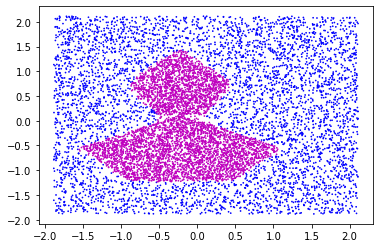

In [ ]:
# Prediction
test_X = test_X.cuda()
pred_y = model(test_X)
pred_y = torch.round(pred_y.data)
pred_y = pred_y.cpu().detach().numpy()

pred_Y = []
for i in pred_y:
    if i == 1:
        pred_Y.append(1)
    else:
        pred_Y.append(0)

# Visualization of test set prediction
visualize_datapoints(test_X.cpu(), np.array(pred_Y))

## 1c)

### Model Design

In [5]:
# Model Hyperparameters
class MLP2(nn.Module):
    def __init__(self, input_size):
        super(MLP2, self).__init__()

        # Add an extra layer
        self.l1 = nn.Linear(input_size, 30)     # Hidden layer 1: input layer
        self.l2 = nn.Linear(30, 10)             # Hidden layer 2
        self.l3 = nn.Linear(10, 2)              # Hidden layer 3
        
        self.l_out = nn.Linear(2, 1)            # Output layer
        
        # Sigmoid activation function
        self.sigmoid = nn.Sigmoid()

        # Initialize weight using Xavier
        nn.init.xavier_uniform_(self.l1.weight.data)
        nn.init.xavier_uniform_(self.l2.weight.data)
        nn.init.xavier_uniform_(self.l_out.weight.data)
    
    def forward(self, x):
        out = self.sigmoid(self.l3(self.sigmoid(self.l2(self.sigmoid(self.l1(x))))))
        out = self.sigmoid(self.l_out(out))
        return out

In [6]:
# Split train/test set
train_size = 50000
train_X = X[:train_size,:]
train_y = Y[:train_size,]
test_X = X[train_size:,:]
test_y = Y[train_size:,]

train_X = torch.Tensor(train_X)
train_y = torch.Tensor(train_y)
test_X = torch.Tensor(test_X)
test_y = torch.Tensor(test_y)

# Normalize data after splitting (center and scale)
mean = train_X.mean()
std = train_X.std()

train_X = (train_X - mean) / std
test_X = (test_X - mean) / std

# Load data
train = TensorDataset(train_X, train_y)
test = TensorDataset(test_X, test_y)

# Data Loader
TRAIN_BATCH_SIZE = 100
TEST_BATCH_SIZE = 100

train_dataloader = DataLoader(train, batch_size=TRAIN_BATCH_SIZE, shuffle = True)
test_dataloader = DataLoader(test, batch_size=TEST_BATCH_SIZE)

### Model Training

In [15]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model = MLP2(input_size=2)
model = model.to(device)

# SGD
epochs = 500
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)
loss_fn = nn.BCELoss()

In [16]:
# Get accuracy and loss
def acc_loss(dataloader, batch_size):
    cnt = 0
    loss = 0
    total = 0

    for images, labels in dataloader:
        images = images.to(device)
        labels = labels.to(device)
        images = images.view(-1, 2)
        labels = labels.view(-1, 1)
        pred = model(images)

        total += labels.size(0)
        preds = torch.round(pred.data)
        cnt += (labels == preds).sum()
        loss += loss_fn(pred, labels)
    acc = 100 * cnt / total
    loss = loss.cpu().data.numpy().item() / total
    return acc, loss

In [17]:
# Training loop
def train(model,
          optimizer,
          loss,
          epochs,
          train_dataloader=train_dataloader,
          test_dataloader=test_dataloader,
          **kwargs):
    
    train_acc_list = []
    train_loss_list = []
    test_acc_list = []
    test_loss_list = []

    for epoch in range(epochs):
        # Train set
        for i, (images, labels) in enumerate(train_dataloader):
            images = images.to(device)
            labels = labels.to(device)

            if i != 0 or epoch != 0:
                optimizer.zero_grad()
            outputs = model(images)
            labels = labels.unsqueeze(1)
            loss = loss_fn(outputs, labels)
            loss.backward()
            optimizer.step()
        
        train_acc, train_loss = acc_loss(dataloader = train_dataloader, batch_size=TRAIN_BATCH_SIZE)
        train_acc_list.append(train_acc.cpu().data.numpy().item())
        train_loss_list.append(train_loss)
      
        # Test set
        test_acc, test_loss = acc_loss(test_dataloader, batch_size=TEST_BATCH_SIZE)
        test_acc_list.append(test_acc.cpu().data.numpy().item())
        test_loss_list.append(test_loss)

        # print only a part of the result
        if epoch % 50 == 0:
            print('Epoch', epoch+1)
            print('Training accuracy: %f %%' % train_acc)
            print('Training loss:', train_loss)
            print('Testing accuracy: %f %%' % test_acc)
            print('Testing loss:', test_loss)
    
    # Plots of training loss and testing accuracy vs. #epochs
    # Training loss
    plt.plot(train_loss_list, color = 'red')
    plt.xlabel('Epoch Number')
    plt.ylabel('Training Loss')
    plt.show()
    # Testing accuracy
    plt.plot(test_acc_list, color = 'blue')
    plt.xlabel('Epoch Number')
    plt.ylabel('Testing Accuracy')
    plt.show()

    # Report mean and standard deviation of the train and test accuracy at the end of 500 epochs
    train_acc_mean = sum(train_acc_list)/len(train_acc_list)
    train_acc_std = 0.5 ** (sum([((x - train_acc_mean) ** 2) for x in train_acc_list]) / len(train_acc_list))
    test_acc_mean = sum(test_acc_list)/len(test_acc_list)
    test_acc_std = 0.5 ** (sum([((x - test_acc_mean) ** 2) for x in test_acc_list]) / len(test_acc_list))

    print('For this run:')
    print('The mean of train accuracy is', train_acc_mean)
    print('The std.dev. of train accuracy is', train_acc_std)
    print('The mean of test accuracy is', test_acc_mean)
    print('The std.dev. of test accuracy is', test_acc_std)

    return train_acc, test_acc # save the training and testing accuracy at the end of 500 epochs

Epoch 1
Training accuracy: 50.046001 %
Training loss: 0.006922882690429687
Testing accuracy: 49.770000 %
Testing loss: 0.006923702239990235
Epoch 51
Training accuracy: 94.332001 %
Training loss: 0.0018478260803222657
Testing accuracy: 95.160004 %
Testing loss: 0.0016893211364746093
Epoch 101
Training accuracy: 97.400002 %
Training loss: 0.000743570556640625
Testing accuracy: 97.709999 %
Testing loss: 0.0006622648239135742
Epoch 151
Training accuracy: 98.860001 %
Training loss: 0.0002966899681091309
Testing accuracy: 98.919998 %
Testing loss: 0.00027836110591888426
Epoch 201
Training accuracy: 98.896004 %
Training loss: 0.000267153377532959
Testing accuracy: 98.879997 %
Testing loss: 0.0002445749044418335
Epoch 251
Training accuracy: 98.942001 %
Training loss: 0.0002692461013793945
Testing accuracy: 99.040001 %
Testing loss: 0.00025119895935058595
Epoch 301
Training accuracy: 99.001999 %
Training loss: 0.00024364225387573242
Testing accuracy: 99.029999 %
Testing loss: 0.0002315697431564

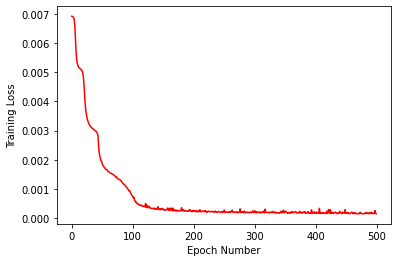

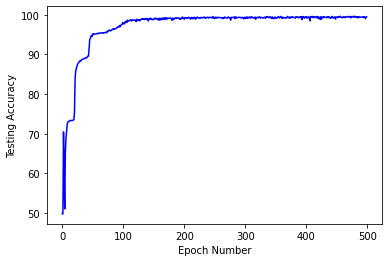

For this run:
The mean of train accuracy is 96.8502279663086
The std.dev. of train accuracy is 1.586212265869969e-14
The mean of test accuracy is 97.02035998535156
The std.dev. of test accuracy is 3.224058294682131e-14


In [10]:
list_of_train_acc = []
list_of_test_acc = []
# Run 1
out = train(model=model, optimizer=optimizer, loss=loss_fn, epochs=epochs)
list_of_train_acc.append(out[0])
list_of_test_acc.append(out[1])

Epoch 1
Training accuracy: 49.953999 %
Training loss: 0.006930579223632813
Testing accuracy: 50.230000 %
Testing loss: 0.006929871368408203
Epoch 51
Training accuracy: 73.078003 %
Training loss: 0.005033533935546875
Testing accuracy: 73.599998 %
Testing loss: 0.004993859481811524
Epoch 101
Training accuracy: 94.699997 %
Training loss: 0.0015035917663574218
Testing accuracy: 95.500000 %
Testing loss: 0.0013634060859680176
Epoch 151
Training accuracy: 97.921997 %
Training loss: 0.0005090506744384766
Testing accuracy: 98.029999 %
Testing loss: 0.0004498480796813965
Epoch 201
Training accuracy: 98.774002 %
Training loss: 0.00031369787216186523
Testing accuracy: 98.940002 %
Testing loss: 0.0002747516393661499
Epoch 251
Training accuracy: 98.643997 %
Training loss: 0.00034133636474609376
Testing accuracy: 98.730003 %
Testing loss: 0.0002978412628173828
Epoch 301
Training accuracy: 98.919998 %
Training loss: 0.00027846038818359374
Testing accuracy: 98.989998 %
Testing loss: 0.0002444925069808

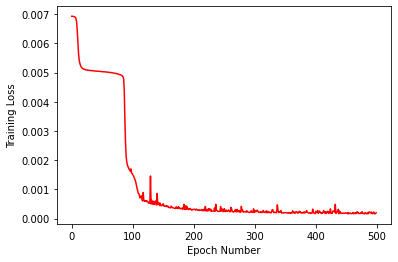

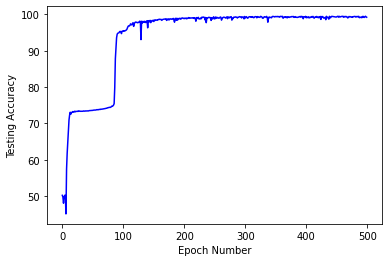

For this run:
The mean of train accuracy is 93.7655358505249
The std.dev. of train accuracy is 6.57785574799318e-37
The mean of test accuracy is 93.94461991882324
The std.dev. of test accuracy is 2.767433457612126e-36


In [11]:
# Run 2
model = MLP2(input_size=2).to(device)
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)
loss_fn = nn.BCELoss()
out = train(model=model, optimizer=optimizer, loss=loss_fn, epochs=epochs)
list_of_train_acc.append(out[0])
list_of_test_acc.append(out[1])

Epoch 1
Training accuracy: 50.046001 %
Training loss: 0.006930233154296875
Testing accuracy: 49.770000 %
Testing loss: 0.006930867004394531
Epoch 51
Training accuracy: 72.867996 %
Training loss: 0.0050552581787109375
Testing accuracy: 73.290001 %
Testing loss: 0.005015896987915039
Epoch 101
Training accuracy: 73.421997 %
Training loss: 0.0049923220825195316
Testing accuracy: 73.930000 %
Testing loss: 0.004955865478515625
Epoch 151
Training accuracy: 95.374001 %
Training loss: 0.0012522366333007813
Testing accuracy: 96.000000 %
Testing loss: 0.001112144374847412
Epoch 201
Training accuracy: 98.610001 %
Training loss: 0.000361275634765625
Testing accuracy: 98.779999 %
Testing loss: 0.0003162668704986572
Epoch 251
Training accuracy: 98.926003 %
Training loss: 0.00029451154708862306
Testing accuracy: 98.910004 %
Testing loss: 0.00026435062885284426
Epoch 301
Training accuracy: 99.230003 %
Training loss: 0.00021255849838256835
Testing accuracy: 99.389999 %
Testing loss: 0.000186103355884552

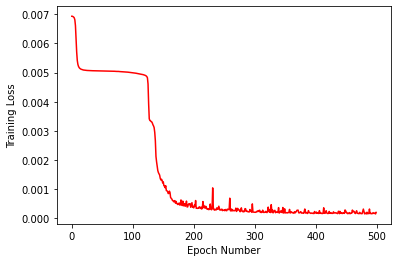

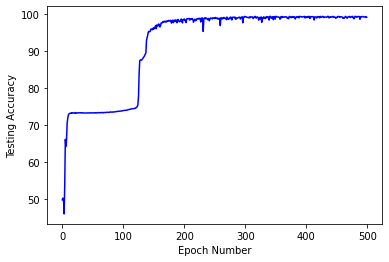

For this run:
The mean of train accuracy is 91.69800401306152
The std.dev. of train accuracy is 9.741239806411922e-43
The mean of test accuracy is 91.91262001037597
The std.dev. of test accuracy is 9.060507719946483e-42


In [13]:
# Run 3
model = MLP2(input_size=2).to(device)
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)
loss_fn = nn.BCELoss()
out = train(model=model, optimizer=optimizer, loss=loss_fn, epochs=epochs)
list_of_train_acc.append(out[0])
list_of_test_acc.append(out[1])

Epoch 1
Training accuracy: 49.953999 %
Training loss: 0.00692952880859375
Testing accuracy: 50.230000 %
Testing loss: 0.006929251098632813
Epoch 51
Training accuracy: 72.865997 %
Training loss: 0.005062359924316406
Testing accuracy: 73.309998 %
Testing loss: 0.005021976852416992
Epoch 101
Training accuracy: 73.000000 %
Training loss: 0.005046069946289062
Testing accuracy: 73.449997 %
Testing loss: 0.005005753707885742
Epoch 151
Training accuracy: 74.153999 %
Training loss: 0.004912654724121094
Testing accuracy: 74.650002 %
Testing loss: 0.0048702297210693355
Epoch 201
Training accuracy: 94.615997 %
Training loss: 0.0014670274353027343
Testing accuracy: 95.290001 %
Testing loss: 0.001333328628540039
Epoch 251
Training accuracy: 98.237999 %
Training loss: 0.00043218032836914063
Testing accuracy: 98.339996 %
Testing loss: 0.0003853997230529785
Epoch 301
Training accuracy: 98.823997 %
Training loss: 0.0003008272171020508
Testing accuracy: 98.879997 %
Testing loss: 0.0002829514026641846
Epo

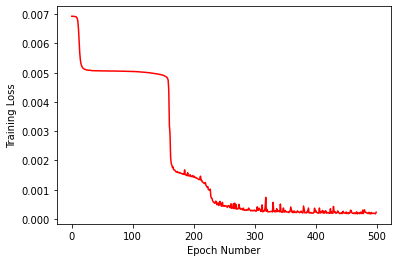

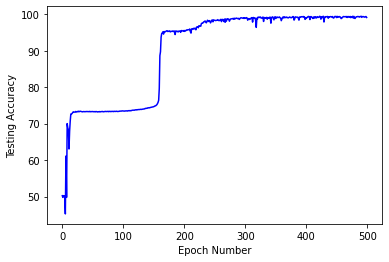

For this run:
The mean of train accuracy is 89.6477601852417
The std.dev. of train accuracy is 1.6751512403508116e-48
The mean of test accuracy is 89.91319989013672
The std.dev. of test accuracy is 9.367965229000621e-48


In [14]:
# Run 4
model = MLP2(input_size=2).to(device)
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)
loss_fn = nn.BCELoss()
out = train(model=model, optimizer=optimizer, loss=loss_fn, epochs=epochs)
list_of_train_acc.append(out[0])
list_of_test_acc.append(out[1])

Epoch 1
Training accuracy: 65.286003 %
Training loss: 0.006922630004882813
Testing accuracy: 65.540001 %
Testing loss: 0.006922463989257812
Epoch 51
Training accuracy: 81.211998 %
Training loss: 0.004411842651367188
Testing accuracy: 82.360001 %
Testing loss: 0.004307881546020508
Epoch 101
Training accuracy: 97.452003 %
Training loss: 0.0007236510467529297
Testing accuracy: 97.730003 %
Testing loss: 0.0006606352806091309
Epoch 151
Training accuracy: 98.692001 %
Training loss: 0.00032584495544433595
Testing accuracy: 98.730003 %
Testing loss: 0.00029475088119506834
Epoch 201
Training accuracy: 98.732002 %
Training loss: 0.0003115431785583496
Testing accuracy: 98.919998 %
Testing loss: 0.00028331074714660646
Epoch 251
Training accuracy: 99.124001 %
Training loss: 0.00021482257843017578
Testing accuracy: 99.169998 %
Testing loss: 0.00019726122617721558
Epoch 301
Training accuracy: 99.150002 %
Training loss: 0.00019849376678466796
Testing accuracy: 99.209999 %
Testing loss: 0.0001773866057

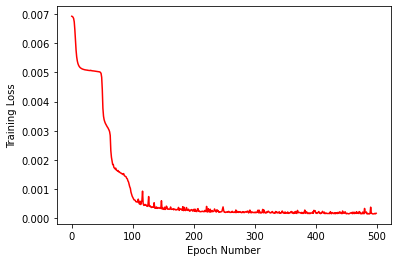

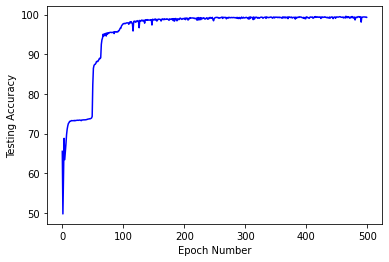

For this run:
The mean of train accuracy is 95.56773996734618
The std.dev. of train accuracy is 2.7311188991957914e-22
The mean of test accuracy is 95.7464400024414
The std.dev. of test accuracy is 8.406860773090599e-22


In [18]:
# Run 5
model = MLP2(input_size=2).to(device)
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)
loss_fn = nn.BCELoss()
out = train(model=model, optimizer=optimizer, loss=loss_fn, epochs=epochs)
list_of_train_acc.append(out[0])
list_of_test_acc.append(out[1])

In [19]:
list_of_train_acc = [x.cpu().data.numpy().item() for x in list_of_train_acc]
list_of_test_acc = [x.cpu().data.numpy().item() for x in list_of_test_acc]

mean_train_acc = sum(list_of_train_acc)/len(list_of_train_acc)
std_train_acc = 0.5 ** (sum([((x - mean_train_acc) ** 2) for x in list_of_train_acc]) / len(list_of_train_acc))
mean_test_acc = sum(list_of_test_acc)/len(list_of_test_acc)
std_test_acc = 0.5 ** (sum([((x - mean_test_acc) ** 2) for x in list_of_test_acc]) / len(list_of_test_acc))

print('The mean training accuracy across the 5 runs is:', mean_train_acc)
print('The std.dev. of training accuracy across the 5 runs is:', std_train_acc)
print('The mean testing accuracy across the 5 runs is:', mean_test_acc)
print('The std.dev. testing accuracy across the 5 runs is:', std_test_acc)


The mean training accuracy across the 5 runs is: 99.210400390625
The std.dev. of training accuracy across the 5 runs is: 0.9906469020021392
The mean testing accuracy across the 5 runs is: 99.27799987792969
The std.dev. testing accuracy across the 5 runs is: 0.9876171474492147


### Visualization

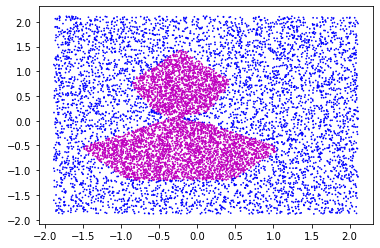

In [ ]:
# Prediction
test_X = test_X.cuda()
pred_y = model(test_X)
pred_y = torch.round(pred_y.data)
pred_y = pred_y.cpu().detach().numpy()

pred_Y = []
for i in pred_y:
    if i == 1:
        pred_Y.append(1)
    else:
        pred_Y.append(0)

# Visualization of test set prediction
visualize_datapoints(test_X.cpu(), np.array(pred_Y))

## Problem 2

All code for Problem 2 should go below. We provide data loaders and relevant imports to get you started. If you are working locally (instead of using Google Colab), we recommend using Conda to install pytorch (https://pytorch.org).

### Imports

In [2]:
## Additional External Libraries (Deep Learning)
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable
from torch.utils.data import Dataset, DataLoader, SubsetRandomSampler
from torchvision import transforms as tfs
from PIL import Image
from torchvision.datasets import FashionMNIST

### Data Loading

In [3]:
# Hyperparameter (Feel Free to Change These, but Make Sure your Training Loop Still Works as Expected)
TRAIN_BATCH_SIZE = 50
VAL_BATCH_SIZE = 50
TEST_BATCH_SIZE = 1

# Transform data to PIL images
transforms = tfs.Compose([tfs.ToTensor()])

# Train/Val Subsets
train_mask = range(50000)
val_mask = range(50000, 60000)

# Download/Load Dataset
train_dataset = FashionMNIST('./data', train=True, transform=transforms, download=True)
test_dataset = FashionMNIST('./data', train=False, transform=transforms, download=True)

# Data Loaders
train_dataloader = DataLoader(train_dataset, batch_size=TRAIN_BATCH_SIZE, sampler=SubsetRandomSampler(train_mask))
val_dataloader = DataLoader(train_dataset, batch_size=VAL_BATCH_SIZE, sampler=SubsetRandomSampler(val_mask))
test_dataloader = DataLoader(test_dataset, batch_size=TEST_BATCH_SIZE)

## Problem 2a)

### Design Model

In [4]:
class CNNet(nn.Module):
    
    """
    
    """
    
    def __init__(self):
        """
        
        """
        ## Inherent Torch Module
        super(CNNet, self).__init__()
        ##TODO: Initialize Model Layers
        # Hidden Layers
        self.conv1 = nn.Conv2d(1, 8, 5)
        self.conv2 = nn.Conv2d(8, 16, 5)
        
        self.fc1 = nn.Linear(4*4*16, 160)
        self.fc2 = nn.Linear(160, 40)
        # Output Layer
        self.fcout = nn.Linear(40, 10)

    def forward(self, x):
        """
        
        """
        ##TODO: Setup Forward Pass
        out = F.relu(F.max_pool2d(self.conv1(x), 2))
        out = F.relu(F.max_pool2d(self.conv2(out), 2))
        out = torch.flatten(out, 1)
        out = F.relu(self.fc1(out))
        out = F.relu(self.fc2(out))
        out = self.fcout(out)
        out = F.log_softmax(out, dim=1)
        return out

### Model Training

In [5]:
def acc_loss(dataloader, batch_size):
    correct = 0
    loss = 0

    for images, labels in dataloader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            
            pred = outputs.argmax(dim=1, keepdim=True)
            loss += loss_f(outputs, labels).item()
            correct += pred.eq(labels.view_as(pred)).sum().item()
    
    size = len(dataloader)*batch_size
    loss /= size
    acc = 100 * correct / size
    return acc, loss


In [6]:
def train(model,
          optimizer,
          loss,
          lr,
          epochs,
          train_dataloader=train_dataloader,
          val_dataloader=val_dataloader,
          test_dataloader=test_dataloader,
          **kwargs):
    """
    
    """
    ##TODO: Implement a training loop
    train_acc_list = []
    train_loss_list = []
    val_acc_list = []
    val_loss_list = []
    test_acc_list = []
    test_loss_list = []

    best_acc = 0

    # model.train()

    for epoch in range(epochs):
        # Train set
        for batch_i, (images, labels) in enumerate(train_dataloader):
            images, labels = images.to(device), labels.to(device)

            outputs = model(images)
            loss = loss_f(outputs, labels)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
        
        print('Epoch', epoch+1)
        train_acc, train_loss = acc_loss(train_dataloader, TRAIN_BATCH_SIZE)
        train_acc_list.append(train_acc)
        train_loss_list.append(train_loss)
        print('Training accuracy: %f %%' % train_acc)
        print('Training loss:', train_loss)

        model.eval()
        # Validation set
        val_acc, val_loss = acc_loss(val_dataloader, VAL_BATCH_SIZE)
        val_acc_list.append(val_acc)
        val_loss_list.append(val_loss)
        print('Validation accuracy: %f %%' % val_acc)
        print('Validation loss:', val_loss)

        model.eval()
        # Test set
        test_acc, test_loss = acc_loss(test_dataloader, TEST_BATCH_SIZE)
        test_acc_list.append(test_acc)
        test_loss_list.append(test_loss)
        print('Testing accuracy: %f %%' % test_acc)
        print('Testing loss:', test_loss)
    
    # Train, validation, test accuracy of the best model
    # We will choose the model with highest validation accuracy to be the best model
        if val_acc > best_acc:
            best_epoch = epoch + 1
            train = train_acc
            val = val_acc
            test = test_acc
            best_acc = val_acc    
    
    print("""\n""")
    print('The best model is obtained at epoch:', best_epoch)
    print('Training accuracy:', train)
    print('Validation accuracy', val)
    print('Testing accuracy', test)


    # Plots of training loss and testing accuracy vs. #epochs
    # Training loss
    plt.plot(train_loss_list, color = 'red')
    plt.xlabel('Epoch Number')
    plt.ylabel('Training Loss')
    plt.show()
    # Validation accuracy
    plt.plot(val_acc_list, color = 'blue')
    plt.xlabel('Epoch Number')
    plt.ylabel('Validation Accuracy')
    plt.show()



In [7]:
# torch.manual_seed(1)
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

## Hyperparameters
EPOCH = 50

##TODO: Choose a Learning Rate
LR = 0.01

## Setting up the model, optimizer, and loss function
model = CNNet().to(device)
##TODO: Choose an optimizer
optimizer = torch.optim.SGD(model.parameters(), lr=LR) 
##TODO: Choose a loss
loss_f = nn.CrossEntropyLoss()

Epoch 1
Training accuracy: 51.858000 %
Training loss: 0.0259989696931839
Validation accuracy: 51.200000 %
Validation loss: 0.026119014358520508
Testing accuracy: 51.200000 %
Testing loss: 1.3076587679035963
Epoch 2
Training accuracy: 68.426000 %
Training loss: 0.016534677554368972
Validation accuracy: 68.400000 %
Validation loss: 0.01647206779718399
Testing accuracy: 67.940000 %
Testing loss: 0.8437427125360235
Epoch 3
Training accuracy: 72.544000 %
Training loss: 0.01430820425271988
Validation accuracy: 72.560000 %
Validation loss: 0.014336034625768662
Testing accuracy: 72.000000 %
Testing loss: 0.7422001966119991
Epoch 4
Training accuracy: 74.122000 %
Training loss: 0.01327785298705101
Validation accuracy: 73.250000 %
Validation loss: 0.013533083939552307
Testing accuracy: 73.410000 %
Testing loss: 0.692629078613135
Epoch 5
Training accuracy: 76.754000 %
Training loss: 0.011989230940937996
Validation accuracy: 76.860000 %
Validation loss: 0.012147242879867553
Testing accuracy: 75.860

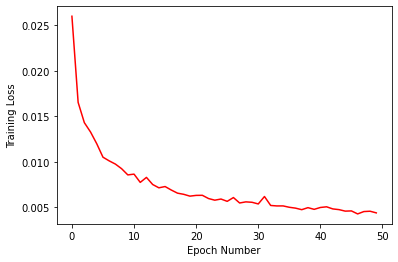

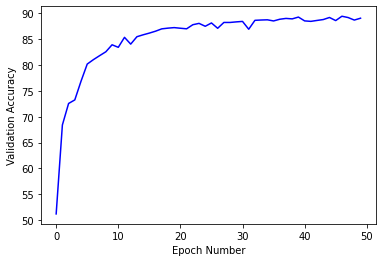

In [8]:
## Run Training Loop
out = train(model, optimizer, loss_f, LR, EPOCH)

## Problem 2b)

Now try to improve your model using additional techniques learned during class. You should be able to use the same training function as above, but will need to create a new model architecture.

### Data Loading

You should maintain the splits from above, but feel free to alter the dataloaders (i.e. transforms) as you wish.

In [3]:
# Hyperparameter (Feel Free to Change These, but Make Sure your Training Loop Still Works as Expected)
TRAIN_BATCH_SIZE = 50
VAL_BATCH_SIZE = 50
TEST_BATCH_SIZE = 1

# Transform data to PIL images
transforms = tfs.Compose([tfs.ToTensor()]) ##TODO: Use the same from above or consider alternatives

# # Data Augmentation
# from skimage.transform import rotate, AffineTransform, warp
# transforms = AffineTransform(translation=(25,25))
# wrapShift = warp(image,transforms,mode='wrap')

# Train/Val Subsets
train_mask = range(50000)
val_mask = range(50000, 60000)

# Download/Load Dataset
train_dataset = FashionMNIST('./data', train=True, transform=transforms, download=True)
test_dataset = FashionMNIST('./data', train=False, transform=transforms, download=True)

# Data Loaders
train_dataloader = DataLoader(train_dataset, batch_size=TRAIN_BATCH_SIZE, sampler=SubsetRandomSampler(train_mask))
val_dataloader = DataLoader(train_dataset, batch_size=VAL_BATCH_SIZE, sampler=SubsetRandomSampler(val_mask))
test_dataloader = DataLoader(test_dataset, batch_size=TEST_BATCH_SIZE)

### Model Design

In [4]:
##TODO: Try to improve upon your previous architecture
class CNNet2(nn.Module):
    
    """
    
    """
    
    def __init__(self):
        """
        
        """
        ## Inherent Torch Module
        super(CNNet2, self).__init__()
        ##TODO: Initialize Model Layers
        # # Hidden Layers
        self.conv1 = nn.Conv2d(1, 8, 5)
        self.conv2 = nn.Conv2d(8, 16, 5)
        
        self.fc1 = nn.Linear(4*4*16, 160)
        self.fc2 = nn.Linear(160, 40)
        # Output Layer
        self.fcout = nn.Linear(40, 10)

        # implement dropout
        self.dropout = nn.Dropout(0.2)

    def forward(self, x):
        """
        
        """
        ##TODO: Setup Forward Pass
        out = F.relu(F.max_pool2d(self.conv1(x), 2))
        out = F.relu(F.max_pool2d(self.conv2(out), 2))
        out = torch.flatten(out, 1)
        out = F.relu(self.fc1(out))
        out = self.dropout(out)
        out = F.relu(self.fc2(out))
        out = self.fcout(out)
        out = F.log_softmax(out, dim=1)
        return out


### Model Training

In [5]:
##TODO: Fit and evaluate your model. What do you observe?
def acc_loss(dataloader, batch_size):
    correct = 0
    loss = 0
    total = 0

    for images, labels in dataloader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            
            pred = outputs.argmax(dim=1)
            loss += loss_f(outputs, labels).item()
            correct += pred.eq(labels).sum().item()
    
    size = len(dataloader)*batch_size
    loss /= size
    acc = 100 * correct / size
    return acc, loss

In [6]:
def train(model,
          optimizer,
          loss,
          lr,
          epochs,
          train_dataloader=train_dataloader,
          val_dataloader=val_dataloader,
          test_dataloader=test_dataloader,
          **kwargs):
    """
    
    """
    ##TODO: Implement a training loop
    train_acc_list = []
    train_loss_list = []
    val_acc_list = []
    val_loss_list = []
    test_acc_list = []
    test_loss_list = []

    best_acc = 0

    # model.train()

    for epoch in range(epochs):
        # Train set
        for batch_i, (images, labels) in enumerate(train_dataloader):
            images, labels = images.to(device), labels.to(device)

            outputs = model(images)
            # labels = labels.unsqueeze(1)
            loss = loss_f(outputs, labels)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
        
        print('Epoch', epoch+1)
        train_acc, train_loss = acc_loss(train_dataloader, TRAIN_BATCH_SIZE)
        train_acc_list.append(train_acc)
        train_loss_list.append(train_loss)
        print('Training accuracy: %f %%' % train_acc)
        print('Training loss:', train_loss)

        model.eval()
        # Validation set
        val_acc, val_loss = acc_loss(val_dataloader, VAL_BATCH_SIZE)
        val_acc_list.append(val_acc)
        val_loss_list.append(val_loss)
        print('Validation accuracy: %f %%' % val_acc)
        print('Validation loss:', val_loss)

        model.eval()
        # Test set
        test_acc, test_loss = acc_loss(test_dataloader, TEST_BATCH_SIZE)
        test_acc_list.append(test_acc)
        test_loss_list.append(test_loss)
        print('Testing accuracy: %f %%' % test_acc)
        print('Testing loss:', test_loss)
    
    # Train, validation, test accuracy of the best model
    # We will choose the model with highest validation accuracy to be the best model
        if val_acc > best_acc:
            best_epoch = epoch + 1
            train = train_acc
            val = val_acc
            test = test_acc
            best_acc = val_acc    
    
    print("""\n""")
    print('The best model is obtained at epoch:', best_epoch)
    print('Training accuracy:', train)
    print('Validation accuracy', val)
    print('Testing accuracy', test)


    # Plots of training loss and testing accuracy vs. #epochs
    # Training loss
    plt.plot(train_loss_list, color = 'red')
    plt.xlabel('Epoch Number')
    plt.ylabel('Training Loss')
    plt.show()
    # Validation accuracy
    plt.plot(val_acc_list, color = 'blue')
    plt.xlabel('Epoch Number')
    plt.ylabel('Validation Accuracy')
    plt.show()

In [7]:
# torch.manual_seed(1)
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

## Hyperparameters
EPOCH = 50

##TODO: Choose a Learning Rate
LR = 0.001

## Setting up the model, optimizer, and loss function
model = CNNet2().to(device)
##TODO: Choose an optimizer
optimizer = torch.optim.Adam(model.parameters(), lr=LR) # use a different optimizer (ADAM)
##TODO: Choose a loss
loss_f = nn.CrossEntropyLoss()

Epoch 1
Training accuracy: 81.248000 %
Training loss: 0.010060252002775669
Validation accuracy: 81.330000 %
Validation loss: 0.009837823395431041
Testing accuracy: 80.950000 %
Testing loss: 0.5039798789386106
Epoch 2
Training accuracy: 85.534000 %
Training loss: 0.007981344314217568
Validation accuracy: 84.630000 %
Validation loss: 0.008384833025932311
Testing accuracy: 84.420000 %
Testing loss: 0.4290240444494282
Epoch 3
Training accuracy: 86.888000 %
Training loss: 0.007085522667020559
Validation accuracy: 86.260000 %
Validation loss: 0.007620708335936069
Testing accuracy: 85.830000 %
Testing loss: 0.3887084961278797
Epoch 4
Training accuracy: 87.906000 %
Training loss: 0.0065574666820466514
Validation accuracy: 86.770000 %
Validation loss: 0.007163602917641401
Testing accuracy: 86.450000 %
Testing loss: 0.37369186524881176
Epoch 5
Training accuracy: 88.712000 %
Training loss: 0.00603758354485035
Validation accuracy: 87.370000 %
Validation loss: 0.0067868238463997844
Testing accuracy

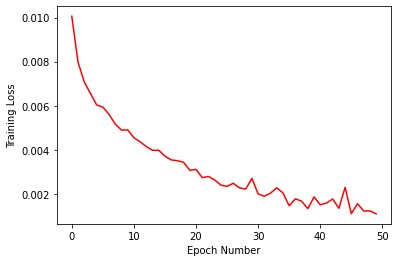

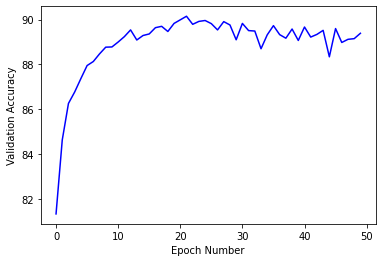

In [8]:
out = train(model, optimizer, loss_f, LR, EPOCH)

## Problem 2c)

Write down your response in the final report.